# STA365: Applied Bayesian Inference HW7
---
## Question 1

\begin{split}
P(\boldsymbol \beta| \textbf{y}, \textbf{X}, \Sigma) &\propto P(\textbf{y} | \boldsymbol \beta, \textbf{X},  \Sigma) \cdot P(\boldsymbol \beta, \Sigma) \\
&= P(\textbf{y} | \boldsymbol \beta, \textbf{X}, \Sigma) \cdot P(\boldsymbol \beta) \cdot P(\Sigma) \\
&\propto P(\textbf{y} | \boldsymbol \beta, \textbf{X},  \Sigma) \cdot P(\boldsymbol \beta) \\
&\propto Exp\{-\frac{1}{2}(\textbf{y}-\textbf{X}\boldsymbol \beta)'  \Sigma ^{-1}(\textbf{y}-\textbf{X}\boldsymbol \beta)\} \cdot Exp\{-\frac{1}{2}(\boldsymbol \beta - \boldsymbol \beta_0)'  \Sigma_\beta ^{-1}(\boldsymbol \beta - \boldsymbol \beta_0)\} \\
&\propto Exp\{-\textbf{y}' \boldsymbol \Sigma^{-1} \textbf{X} \boldsymbol \beta - 2(\textbf{X} \boldsymbol \beta)'  \Sigma^{-1} \textbf{y} + \boldsymbol \beta ' \Sigma_\beta^{-1} \boldsymbol \beta - 2 \boldsymbol \beta' \Sigma_\beta^{-1} \boldsymbol \beta_0 \} \\
&\propto Exp\{-\frac{1}{2}[\boldsymbol \beta'(\textbf{X}' \Sigma^{-1}\textbf{X} +  \Sigma_\beta^{-1})\boldsymbol \beta - 2 \boldsymbol \beta'(\textbf{X}' \Sigma^{-1}\textbf{y} +  \Sigma_\beta^{-1}\boldsymbol \beta_0)  ] \} \\
&= Exp\{-\frac{1}{2}[\boldsymbol\beta-(\textbf{X}' \Sigma^{-1}\textbf{y} +  \Sigma_\beta^{-1}\boldsymbol \beta_0)]' (\textbf{X}' \Sigma^{-1}\textbf{X} +  \Sigma_\beta^{-1}) [\boldsymbol\beta-(\textbf{X}' \Sigma^{-1}\textbf{y} +  \Sigma_\beta^{-1}\boldsymbol \beta_0)] \} \\
&\sim \mathcal{MVN}(E[\boldsymbol \beta]= \textbf{X}' \Sigma^{-1}\textbf{y} +  \Sigma_\beta^{-1}\boldsymbol \beta_0,\ Cov[\boldsymbol \beta]=(\textbf{X}' \Sigma^{-1}\textbf{X} +  \Sigma_\beta^{-1})^{-1}) \\
\\
P(\sigma^2| \textbf{y}, \textbf{X}, \boldsymbol \beta) &\propto \prod_{i=1}^n P(y_i | \textbf{x}_i, \boldsymbol \beta,\sigma^2) \cdot P(\sigma^2) \\
&= \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} Exp\{-\frac{1}{2\sigma^2}(y_i-\textbf{x}_i' \boldsymbol\beta)^2\}\cdot \frac{\beta^*}{\Gamma(\alpha^*)}(\sigma^2)^{-\alpha^*-1} Exp\{-\frac{\beta^*}{\sigma^2} \} \\
&\propto (\sigma^2)^{-\frac{n}{2}-\alpha^*-1} \cdot Exp\{-\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i-\textbf{x}_i' \boldsymbol\beta)^2 -\frac{\beta^*}{\sigma^2}\} \\
&= (\sigma^2)^{-(\alpha^* + \frac{n}{2})-1} \cdot Exp\{-\frac{1}{\sigma^2} [\frac{1}{2} \sum_{i=1}^n (y_i-\textbf{x}_i' \boldsymbol\beta)^2 + \beta^*]\} \\
&\propto \frac{(\frac{1}{2} \sum_{i=1}^n (y_i-\textbf{x}_i' \boldsymbol\beta)^2 + \beta^*)^{\alpha^*+\frac{n}{2}}}{\Gamma(\alpha^*+\frac{n}{2})} \cdot (\sigma^2)^{-(\alpha^* + \frac{n}{2})-1} \cdot Exp\{-\frac{1}{\sigma^2} [\frac{1}{2} \sum_{i=1}^n (y_i-\textbf{x}_i' \boldsymbol\beta)^2 + \beta^*]\} \\
&\sim invgamma(\alpha = \alpha^*+\frac{n}{2}, \beta = \frac{1}{2} \sum_{i=1}^n (y_i-\textbf{x}_i' \boldsymbol\beta)^2 + \beta^*)
\end{split}

## Question 2

In [1]:
import pymc as pm
import numpy as np
import pandas as pd

df = pd.read_csv("housing.csv")

In [3]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [4]:
df[df['total_bedrooms'].isnull()].index

Index([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,  1493,
       ...
       19932, 19959, 20046, 20069, 20125, 20267, 20268, 20372, 20460, 20484],
      dtype='int64', length=207)

In [2]:
df2 = df.drop(df[df['total_bedrooms'].isnull()].index)

In [6]:
df2.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [84]:
X = df2.iloc[:, :-1].to_numpy()
y_obs = df2['median_house_value'].to_numpy()
p = X.shape[1]

with pm.Model() as LR:

    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    y = pm.Normal('y', mu=X@betas, sigma=sigma, observed=y_obs)
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1442 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


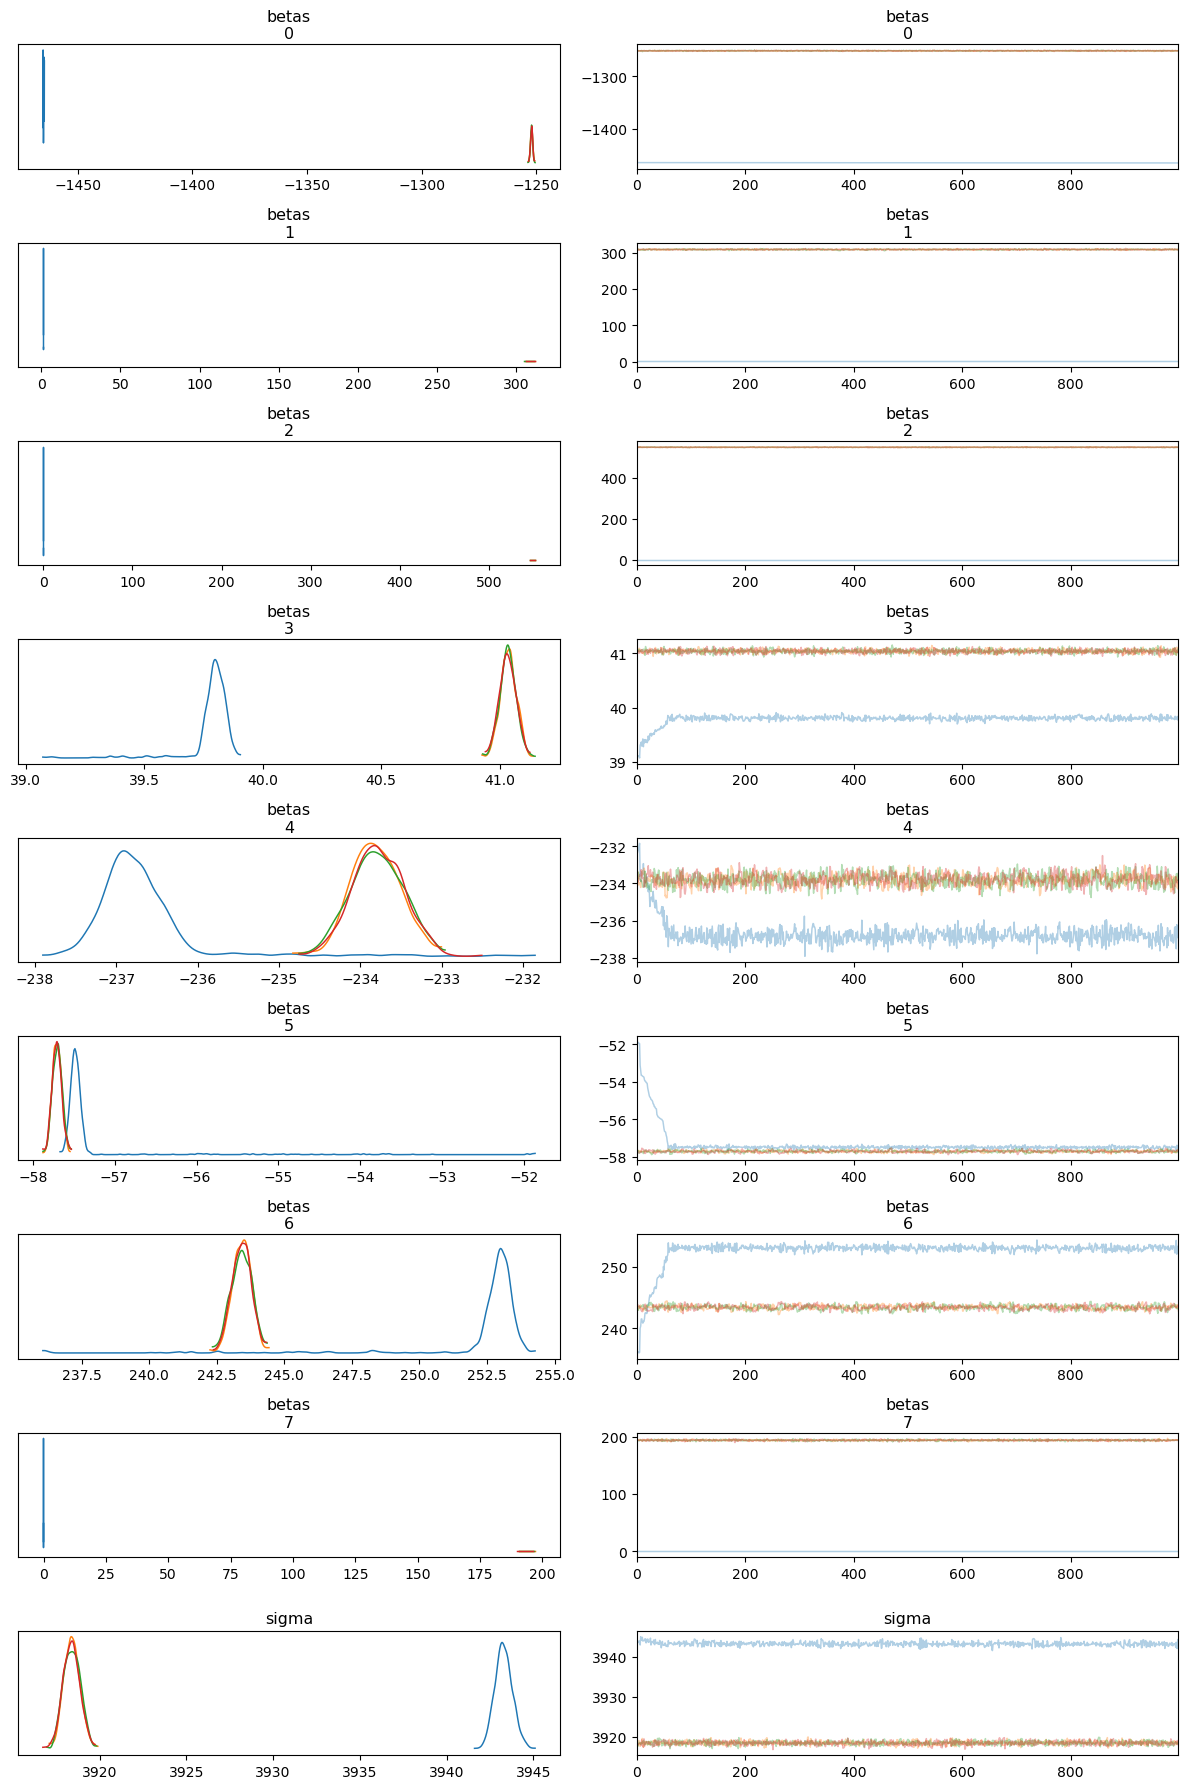

In [99]:
import matplotlib.pyplot as plt
import arviz as az

az.plot_trace(idata, compact = False)
plt.tight_layout()
plt.show()

In [100]:
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-1305.28410,92.17486,-1465.23897,-1251.39619,45.90230,35.14652,6.72898,10.83680,1.59331
betas[1],231.62863,133.17291,0.99970,309.91008,66.31840,50.77859,7.16133,33.58265,1.52815
betas[2],411.36962,237.78241,-0.42788,549.91210,118.41409,90.66734,6.76885,11.34955,1.59235
betas[3],40.72290,0.54381,39.76367,41.10287,0.26960,0.20628,7.15353,24.76015,1.53052
betas[4],-234.51874,1.32833,-237.14987,-233.20611,0.62934,0.47802,7.72184,30.33392,1.50365
betas[5],-57.61138,0.39225,-57.81096,-57.41864,0.09263,0.06769,7.28226,24.62384,1.52009
betas[6],245.70025,4.10647,242.74700,253.39971,1.97731,1.50608,8.02792,28.06970,1.52657
betas[7],145.18937,84.02018,-0.31164,195.15484,41.83962,32.03552,7.04062,12.59392,1.54522
sigma,3924.62469,10.79380,3917.46507,3943.75868,5.37034,4.11132,7.15025,27.12532,1.53029


Observations:
- Individual chain mixing seems to be fine judging the trace plots
- Poor cross-chain mixing as indicated by the high r-hat and the split chain distributions in the posterior and trace plots above across all parameters
- Very poor effective sample size across all parameters

In [101]:
with LR:
    idata2 = pm.sample(target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1726 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [102]:
az.summary(idata2, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-1162.23708,499.70046,-1465.02251,-20.56592,228.80324,174.56217,4.60031,11.42861,3.00866
betas[1],413.84609,630.21298,-0.63240,1808.07683,295.95190,224.43389,4.44215,11.14517,3.78354
betas[2],143.83166,246.41376,-0.59234,571.16169,122.71232,93.95846,4.58822,26.39861,2.93391
betas[3],34.87853,4.52682,29.28548,39.70793,2.25216,1.72414,4.77655,14.69789,2.56528
betas[4],-118.04771,110.84056,-236.68145,0.02667,55.14716,42.21828,5.03433,26.09655,2.26244
betas[5],-51.87662,5.43825,-57.72022,-40.92953,2.41785,1.82359,5.09529,10.82578,2.49765
betas[6],157.41300,119.23311,33.45526,322.69369,59.15370,45.26292,4.59065,11.42107,2.90013
betas[7],92.94696,97.52396,-0.87287,208.07754,47.57951,36.30259,4.55240,19.71182,3.24467
sigma,4028.75021,162.02991,3937.52739,4400.88574,73.34954,55.34301,4.61466,11.20611,2.85523


In [103]:
with LR:
    idata3 = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1303 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [104]:
az.summary(idata3, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-1272.50247,35.35229,-1334.21295,-1251.23378,17.60390,13.47883,7.16350,25.62953,1.53365
betas[1],231.34030,133.64941,-0.72477,309.93685,66.55561,50.96020,6.76182,11.37423,1.59523
betas[2],553.23291,8.11910,547.02728,568.19874,4.02105,3.07621,7.27730,30.96691,1.53047
betas[3],41.12759,0.16321,40.96652,41.44152,0.07946,0.06061,7.21527,30.68207,1.52841
betas[4],-234.07409,0.57226,-235.23597,-233.22320,0.23875,0.17829,7.49427,31.11068,1.49958
betas[5],-57.70575,0.05875,-57.81944,-57.60000,0.00134,0.00095,1916.09503,2237.99713,1.00840
betas[6],243.70942,0.62348,242.74246,244.94463,0.25228,0.18776,7.67548,34.64941,1.47818
betas[7],145.44487,83.58447,0.68426,195.08503,41.62267,31.86942,6.98151,26.77469,1.55925
sigma,3919.05582,1.24011,3917.52195,3921.61588,0.56649,0.42785,7.16423,30.68831,1.52721


In [105]:
with LR:
    idata4 = pm.sample(tune=4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 4_000 tune and 1_000 draw iterations (16_000 + 4_000 draws total) took 712 seconds.


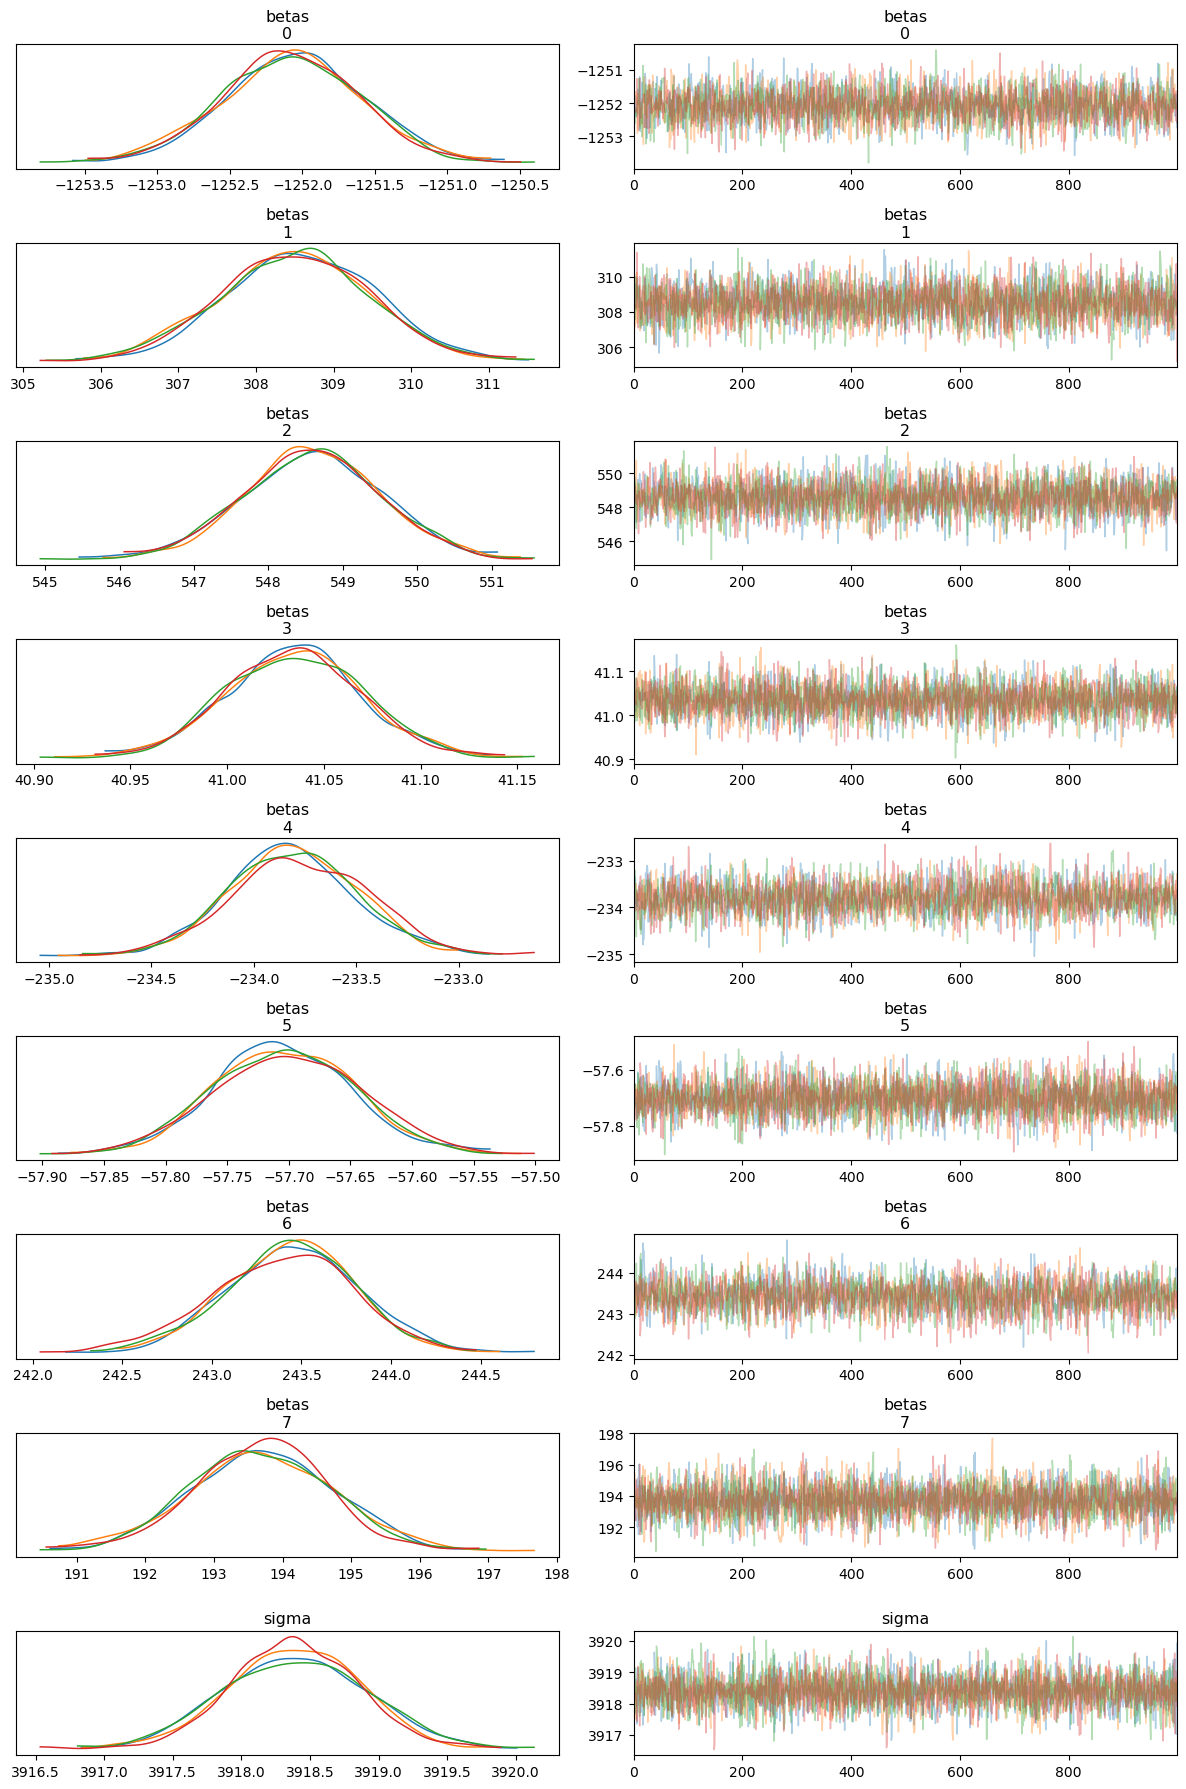

In [107]:
az.plot_trace(idata4, compact = False)
plt.tight_layout()
plt.show()

In [106]:
az.summary(idata4, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-1252.07394,0.47511,-1252.97402,-1251.18850,0.00849,0.00600,3126.33083,3160.45693,1.00042
betas[1],308.52118,0.95132,306.67278,310.20849,0.01623,0.01148,3460.45027,2867.82063,1.00090
betas[2],548.58607,0.91842,546.94088,550.37992,0.01513,0.01070,3681.67351,2675.64870,1.00046
betas[3],41.03464,0.03488,40.97010,41.10164,0.00053,0.00038,4265.25102,2838.91080,0.99964
betas[4],-233.80068,0.32165,-234.41925,-233.22180,0.00628,0.00444,2623.73189,2693.44524,1.00226
betas[5],-57.70308,0.05721,-57.81286,-57.59785,0.00085,0.00060,4547.47504,2921.97580,1.00214
betas[6],243.43190,0.36619,242.70681,244.09620,0.00719,0.00509,2595.89985,2619.65408,1.00371
betas[7],193.69086,1.02143,191.73301,195.61993,0.01444,0.01021,5038.59865,2400.38551,1.00111
sigma,3918.38947,0.50503,3917.44038,3919.31506,0.00727,0.00514,4830.84012,3013.40260,1.00492


Observations:
- Chains are well mixed (within and between; $\hat R \approx 1$) and all appear to have converged
- effective sample size is reasonably high

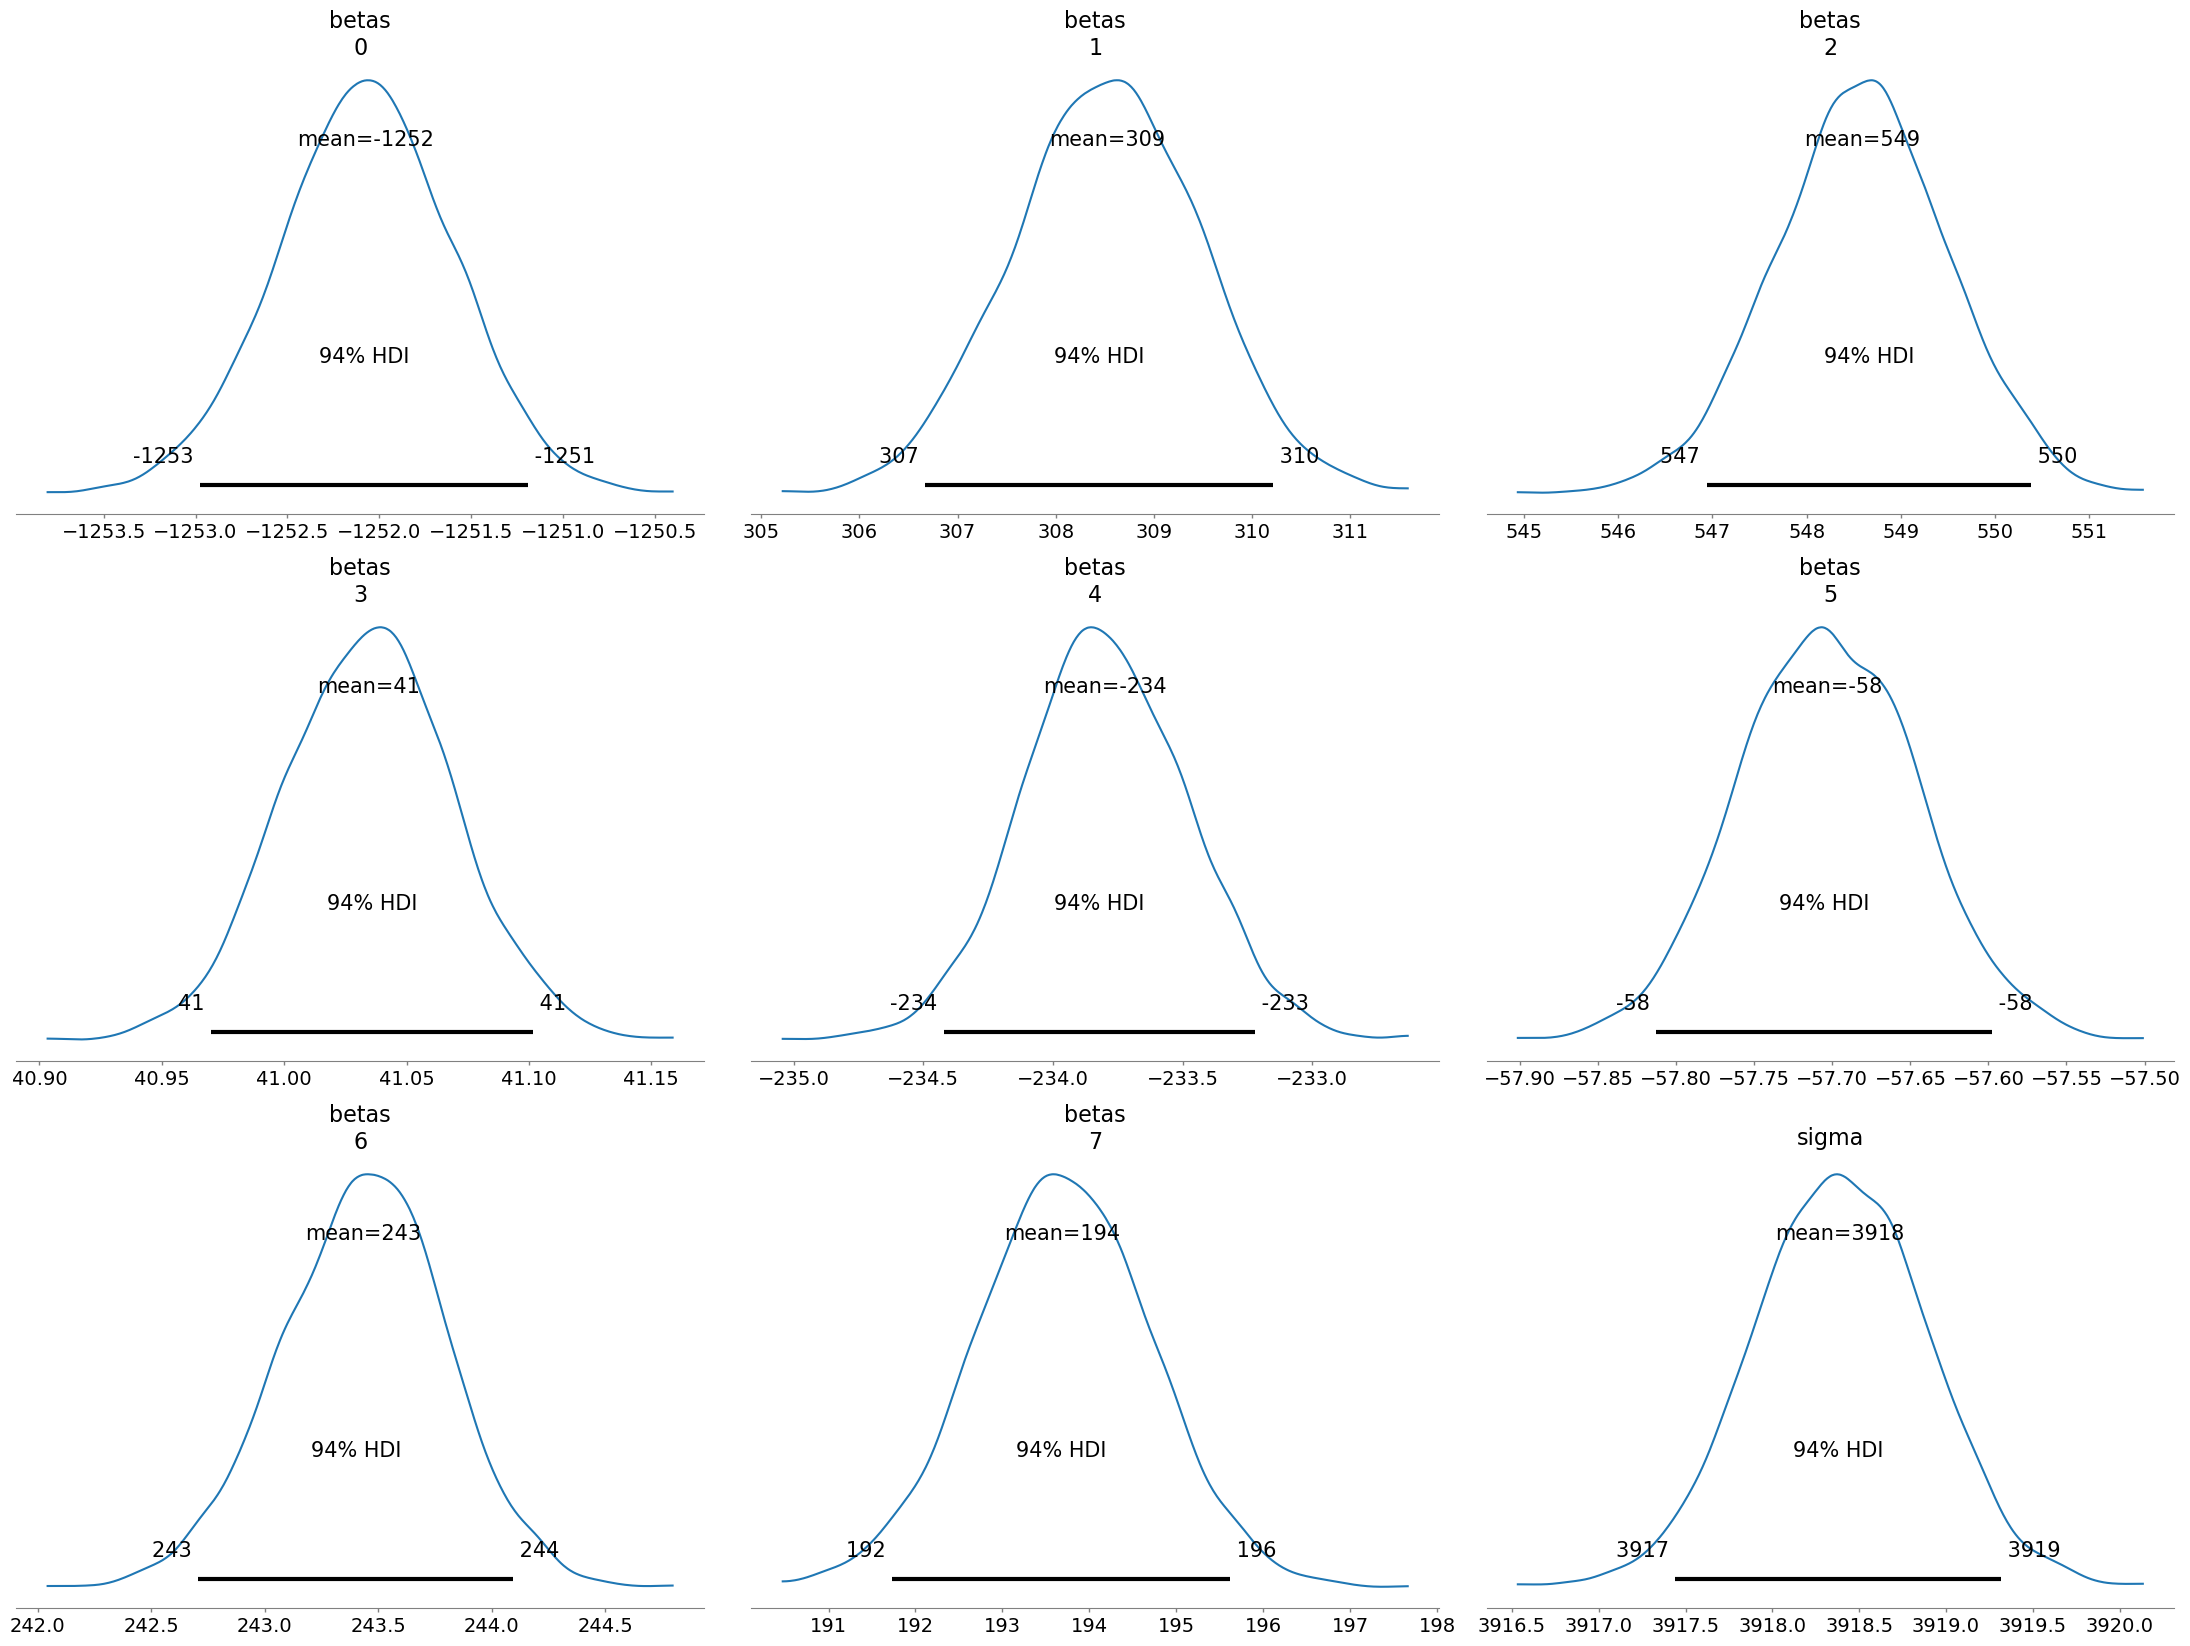

In [109]:
az.plot_posterior(idata4)
plt.tight_layout()
plt.show()

Apply log to median house value to better satisfy linearity in the response

In [10]:
X = df2.iloc[:, :-1].to_numpy()
y_obs = df2['median_house_value'].apply(lambda x: np.log(x)).to_numpy()
p = X.shape[1]

with pm.Model() as LR:

    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    y = pm.Normal('y', mu=X@betas, sigma=sigma, observed=y_obs)
    
    idata = pm.sample(tune=4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 4_000 tune and 1_000 draw iterations (16_000 + 4_000 draws total) took 1763 seconds.


In [12]:
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.14307,0.00051,-0.14404,-0.14216,0.00001,0.00001,1935.11782,2202.21576,1.00113
betas[1],-0.16818,0.00159,-0.17112,-0.16522,0.00004,0.00002,2046.25524,2102.48430,1.00068
betas[2],0.00530,0.00021,0.00489,0.00569,0.00000,0.00000,3351.25177,2896.32914,1.00057
betas[3],-0.00005,0.00000,-0.00006,-0.00005,0.00000,0.00000,2148.64379,2510.18554,1.00074
betas[4],0.00037,0.00003,0.00031,0.00044,0.00000,0.00000,1691.34139,2030.49864,1.00288
betas[5],-0.00018,0.00001,-0.00019,-0.00017,0.00000,0.00000,2621.43946,2667.88851,1.00017
betas[6],0.00052,0.00004,0.00046,0.00059,0.00000,0.00000,1834.02357,2231.34353,1.00169
betas[7],0.19560,0.00168,0.19240,0.19871,0.00004,0.00003,2246.45188,2668.39790,1.00102
sigma,0.35220,0.00174,0.34902,0.35548,0.00003,0.00002,4140.90048,2994.18392,1.00078


Based on the posterior samples...
- Latitude, Longitude, and median household income ($\beta_0$, $\beta_1$, $\beta_7$) have the greatest effect on log median house value
    - higher longitudes and latitudes associated with lower log median house value
    - intuitively, higher median income in the area is associated with higher log median house value

## Question 3

In [2]:
df3 = pd.read_csv("used_device_data.csv")

In [3]:
df3.isnull().any()

screen_size              False
internal_memory           True
ram                       True
days_used                False
normalized_used_price    False
dtype: bool

In [4]:
df3 = df3.dropna(how='any',axis=0)

In [5]:
df3.isnull().any()

screen_size              False
internal_memory          False
ram                      False
days_used                False
normalized_used_price    False
dtype: bool

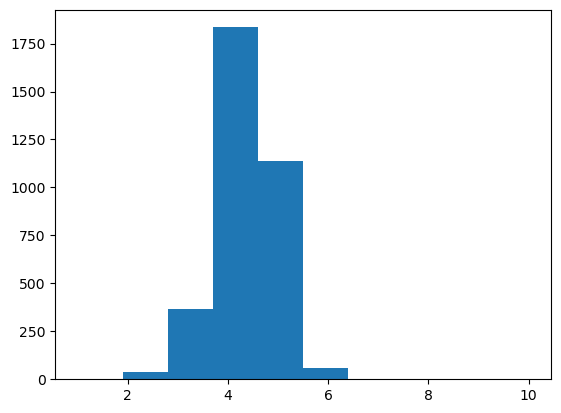

In [44]:
y_obs = df3['normalized_used_price'].to_numpy()
plt.hist(y_obs)
plt.show()

In [9]:
new_rows = pd.DataFrame({"screen_size": [30.7, 3.2], 
                         "internal_memory": [128, 16],
                         "ram": [10,2],
                         "days_used": [20,300],
                         "normalized_used_price": [1,10]})
df3 = pd.concat([df3, new_rows], ignore_index=True)

In [12]:
df3

,screen_size,internal_memory,ram,days_used,normalized_used_price
0,14.50,64.0,3.0,127,4.307572
1,17.30,128.0,8.0,325,5.162097
2,16.69,128.0,8.0,162,5.111084
3,25.50,64.0,6.0,345,5.135387
4,15.32,64.0,3.0,293,4.389995
...,...,...,...,...,...
3443,15.80,32.0,3.0,201,4.357350
3444,15.80,32.0,2.0,149,4.349762
3445,12.83,16.0,2.0,176,4.132122
3446,30.70,128.0,10.0,20,1.000000


In [13]:
X = df3.iloc[:, :-1].to_numpy()
y_obs = df3['normalized_used_price'].to_numpy()
n,p = X.shape

with pm.Model() as RLR:
    
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    tau = pm.Gamma("tau", alpha=2, beta=1)
    nu = pm.Exponential("nu", 1/10)
    tau_i = pm.Gamma('tau_i', alpha=nu/2, beta=nu/2, shape=n)
    
    y = pm.Normal('y', mu=X@betas, tau=tau*tau_i, observed=y_obs)
    
    idata = pm.sample(chains=4, draws=500, tune=100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, tau, nu, tau_i]


Sampling 4 chains for 100 tune and 500 draw iterations (400 + 2_000 draws total) took 2356 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [16]:
az.summary(idata, var_names=["betas", "tau", "nu"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.154,0.003,0.148,0.159,0.001,0.001,12.0,43.0,1.25
betas[1],0.002,0.000,0.001,0.002,0.000,0.000,12.0,45.0,1.23
betas[2],0.311,0.008,0.297,0.326,0.001,0.001,28.0,262.0,1.10
betas[3],0.001,0.000,0.001,0.001,0.000,0.000,17.0,50.0,1.16
tau,2.325,0.157,2.102,2.598,0.058,0.044,6.0,28.0,1.66
nu,6.218,0.338,5.789,6.635,0.064,0.046,12.0,55.0,1.25


*Ideally run for more iterations, but for sake of time and compute, capped at 500 iterations
- Bigger screen and more ram intuitively is associated with higher normalized used price
- memory and days used don't have much effect on the price

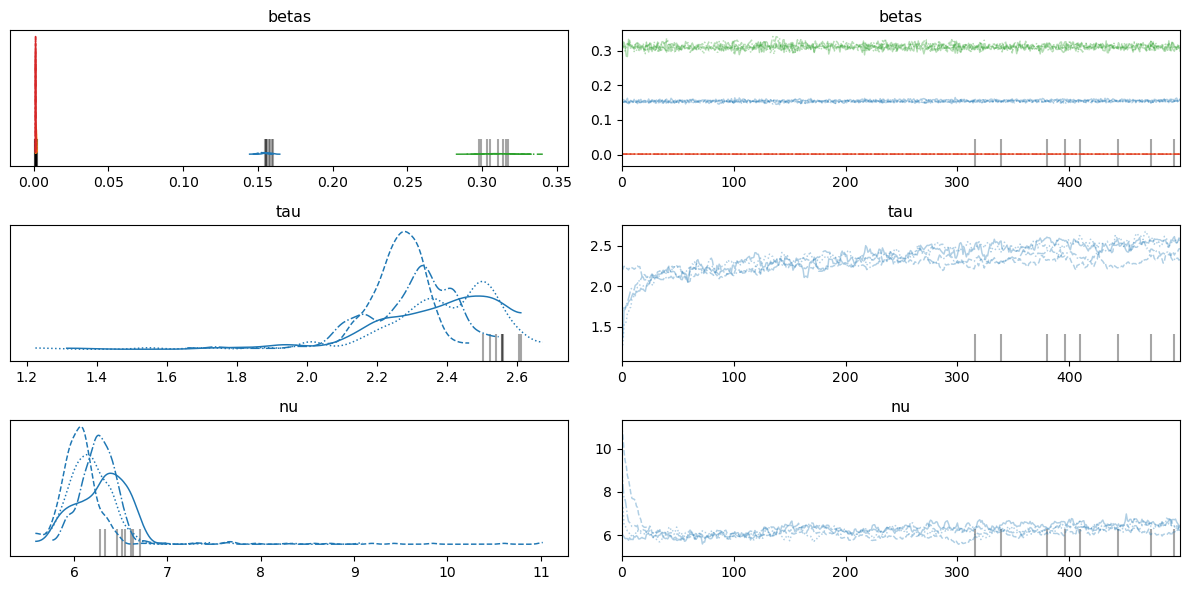

In [19]:
az.plot_trace(idata, var_names=["betas", "tau", "nu"])
plt.tight_layout()
plt.show()

In [28]:
tau_i_post = idata.posterior["tau_i"].mean(dim=["chain", "draw"])
outlier_indices = np.argsort(tau_i_post)[-3:]
print("Potential outliers:", outlier_indices)

Potential outliers: <xarray.DataArray 'tau_i' (tau_i_dim_0: 3)> Size: 24B
array([1619, 2756,  764])
Coordinates:
  * tau_i_dim_0  (tau_i_dim_0) int64 24B 3445 3446 3447


In [29]:
sigma_i_sq_post = (idata.posterior["tau"] * idata.posterior["tau_i"]).mean(dim=["chain", "draw"])
D = np.diag(sigma_i_sq_post)
H = X @ np.linalg.inv(X.T @ D @ X) @ X.T
influence = np.diag(H)

print("Influence for potential outliers:", influence[outlier_indices])

Influence for potential outliers: [0.00011888 0.00021114 0.00027597]


- Didn't identify the inserted outliers (perhaps it wasn't as much of an outlier as I initially thought when adding it in)

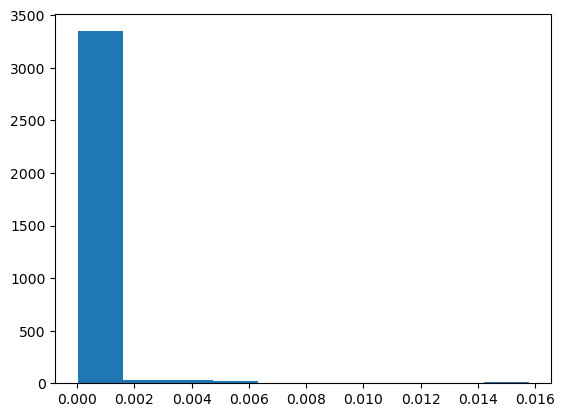

In [21]:
plt.hist(influence)
plt.show()

In [36]:
print(influence[764]) #Index with highest mean influence
df3.iloc[764]

0.0002759661735093503


screen_size               17.780000
internal_memory           32.000000
ram                        4.000000
days_used                970.000000
normalized_used_price      4.703929
Name: 764, dtype: float64

In [41]:
print(influence[3447]) #inserted point
df3.iloc[3447]

7.515861804572204e-05


screen_size                3.2
internal_memory           16.0
ram                        2.0
days_used                300.0
normalized_used_price     10.0
Name: 3447, dtype: float64

- 3447: Low specs, less days used, high price
- 746: better specs, more days_used, lower price